<a href="https://colab.research.google.com/github/onecme/dataMining/blob/main/TI09_ElyasRandiRenaldi_0110223277_PratikumMandiri11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from scipy.stats import kstest, shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/student_lifestyle_dataset.csv')
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


##**Cleaning**

In [5]:
df.isnull().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [6]:
df.duplicated().sum()

0

In [7]:
df['Stress_Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [8]:
replacements = {
    'Stress_Level': {
        'Low': 0,
        'Moderate': 1,
        'High': 2
    }
}

df.replace(replacements, inplace=True)
df

<ipython-input-8-1667accda8ed>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,1
1,2,5.3,3.5,8.0,4.2,3.0,2.75,0
2,3,5.1,3.9,9.2,1.2,4.6,2.67,0
3,4,6.5,2.1,7.2,1.7,6.5,2.88,1
4,5,8.1,0.6,6.5,2.2,6.6,3.51,2
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,1
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,1
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,1
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,2


<ipython-input-9-5f3d125fb80f>:23: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


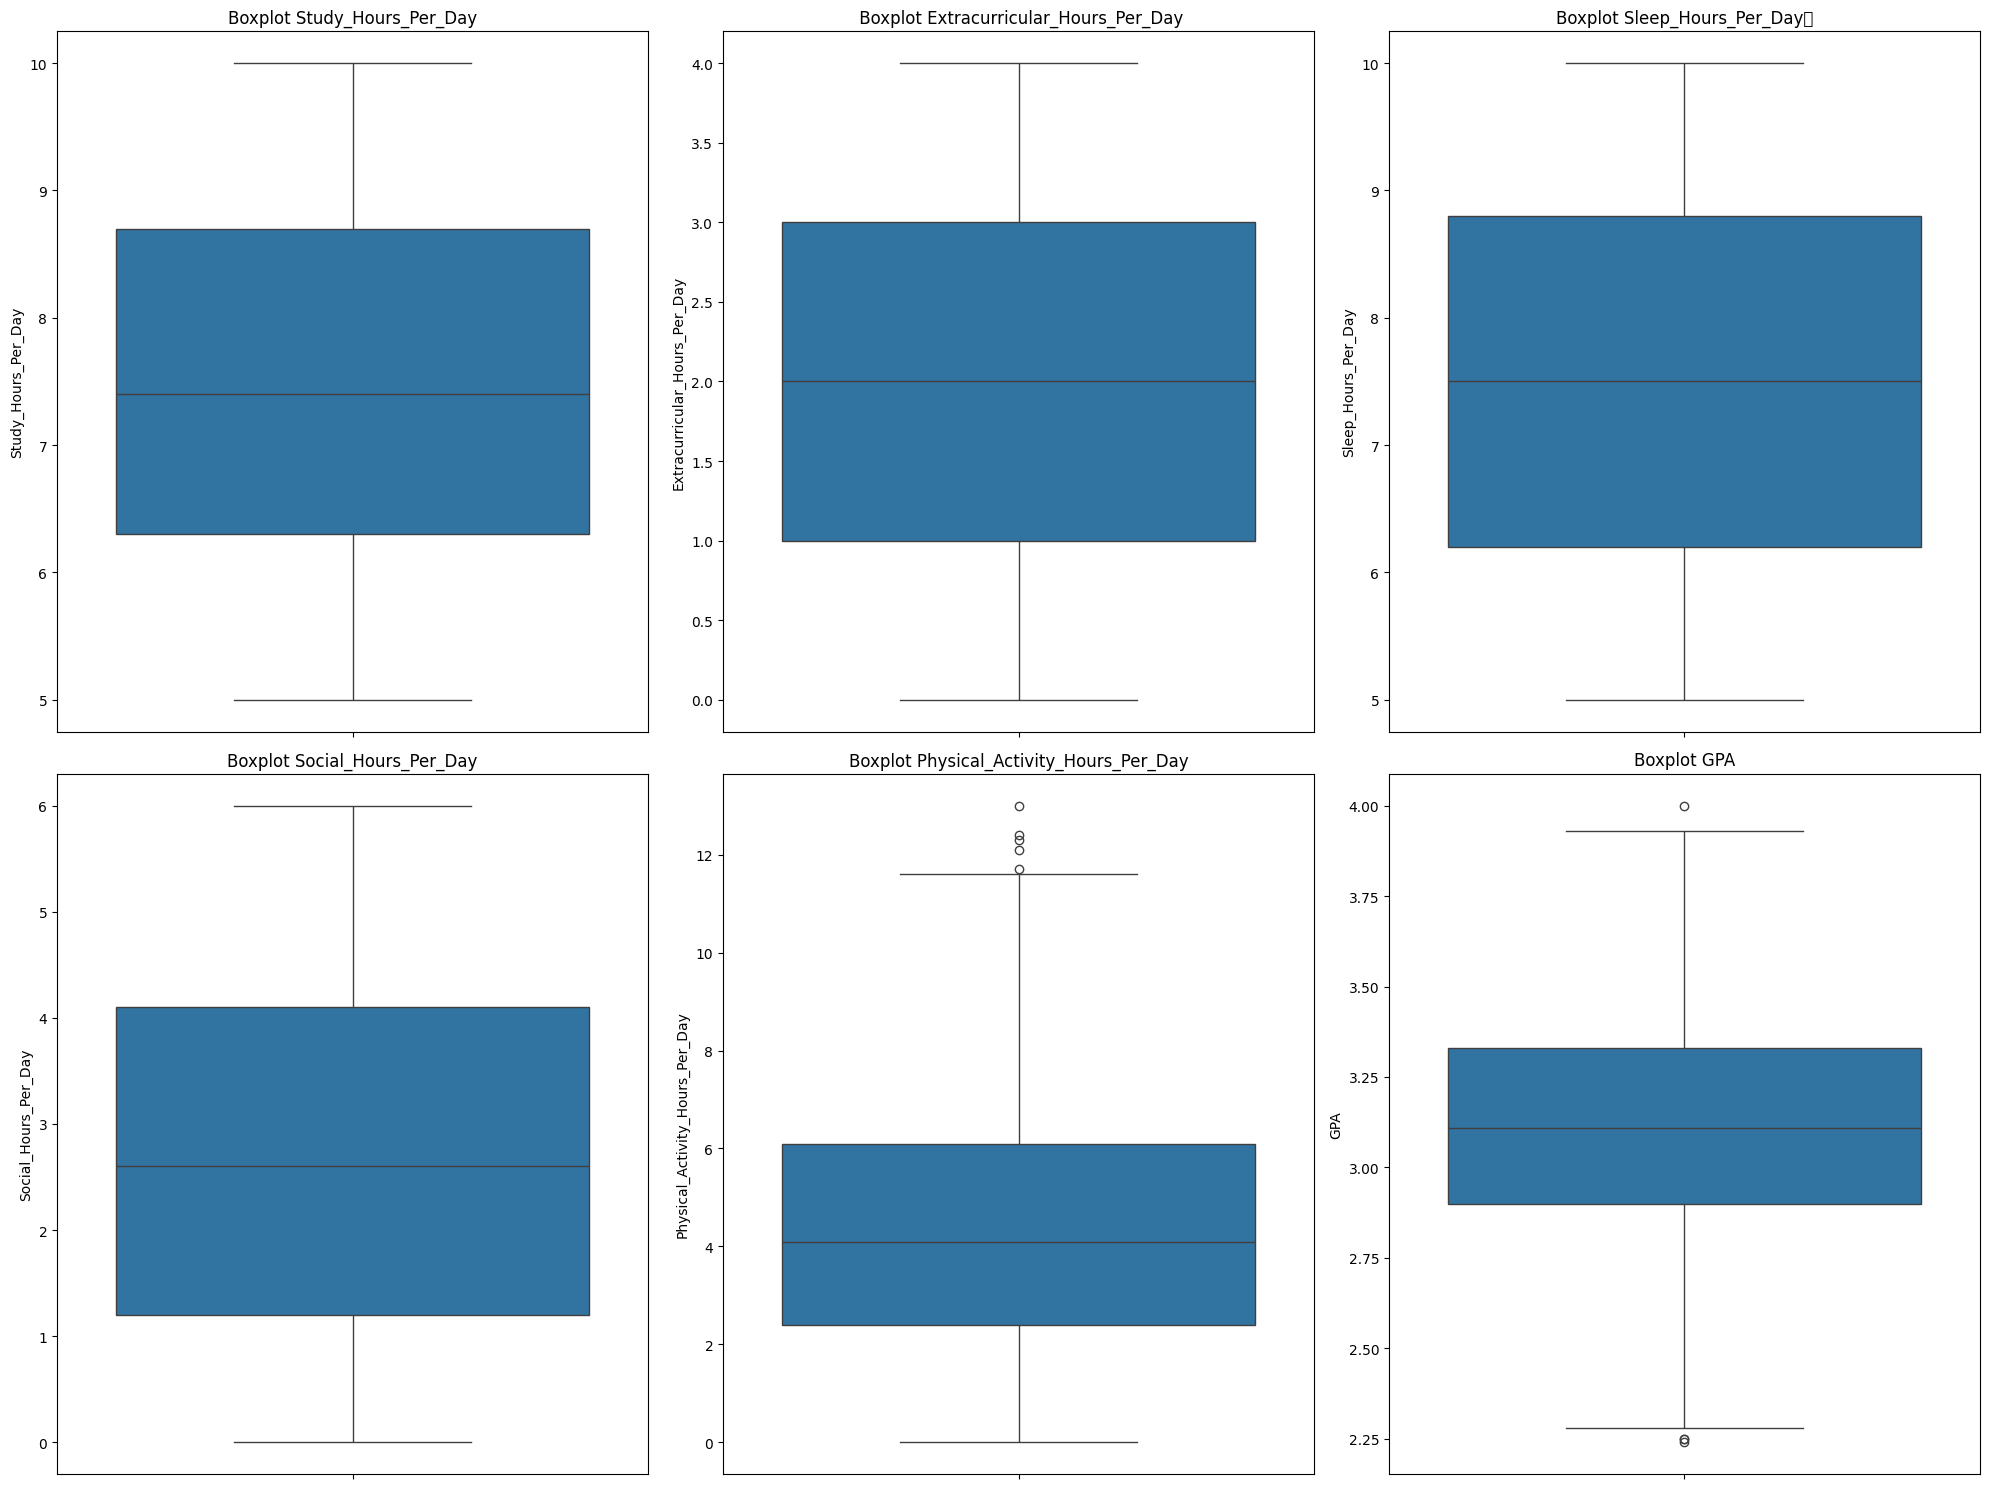

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

axes = axes.flatten()

sns.boxplot(y= 'Study_Hours_Per_Day', data=df, ax=axes[0])
axes[0].set_title('Boxplot Study_Hours_Per_Day')

sns.boxplot(y= 'Extracurricular_Hours_Per_Day', data=df, ax=axes[1])
axes[1].set_title(' Boxplot Extracurricular_Hours_Per_Day')

sns.boxplot(y= 'Sleep_Hours_Per_Day', data=df, ax=axes[2])
axes[2].set_title('Boxplot Sleep_Hours_Per_Day	')

sns.boxplot(y= 'Social_Hours_Per_Day',  data=df, ax=axes[3])
axes[3].set_title('Boxplot Social_Hours_Per_Day')

sns.boxplot(y= 'Physical_Activity_Hours_Per_Day', data=df, ax=axes[4])
axes[4].set_title('Boxplot Physical_Activity_Hours_Per_Day')

sns.boxplot(y= 'GPA', data=df, ax=axes[5])
axes[5].set_title('Boxplot GPA')

plt.tight_layout()
plt.show

##**Uji Normalitas**

In [10]:
# menentukan threhold untuk uji normalitas
sig_level = 0.05

In [11]:
# Membuat variabel input
Study_Hours_Per_Day = 'Study_Hours_Per_Day'
Extracurricular_Hours_Per_Day = 'Extracurricular_Hours_Per_Day'
Sleep_Hours_Per_Day = 'Sleep_Hours_Per_Day'
Social_Hours_Per_Day = 'Social_Hours_Per_Day'
Physical_Activity_Hours_Per_Day = 'Physical_Activity_Hours_Per_Day'
gpa = 'GPA'
Stress_Level = 'Stress_Level'

In [12]:
# Uji shapiro wilk
shapiro_Study_Hours_Per_Day = shapiro(df[Study_Hours_Per_Day])
shapiro_Extracurricular_Hours_Per_Day = shapiro(df[Extracurricular_Hours_Per_Day])
shapiro_Sleep_Hours_Per_Day = shapiro(df[Sleep_Hours_Per_Day])
shapiro_Social_Hours_Per_Day = shapiro(df[Social_Hours_Per_Day])
shapiro_Physical_Activity_Hours_Per_Day = shapiro(df[Physical_Activity_Hours_Per_Day])
shapiro_gpa = shapiro(df[gpa])
shapiro_Stress_Level = shapiro(df[Stress_Level])

In [13]:
def shapiro_test(x):

  val = x[1]
  if val > sig_level:
    return 'Normal distribution with a value of ', round(val,2)
  else :
    return 'Non - Normal distribution with a value of ', round(val,2)


In [14]:
print(f'{Study_Hours_Per_Day}: {shapiro_test(shapiro_Study_Hours_Per_Day)}')
print(f'{Extracurricular_Hours_Per_Day}: {shapiro_test(shapiro_Extracurricular_Hours_Per_Day)}')
print(f'{Sleep_Hours_Per_Day}: {shapiro_test(shapiro_Sleep_Hours_Per_Day)}')
print(f'{Social_Hours_Per_Day}: {shapiro_test(shapiro_Social_Hours_Per_Day)}')
print(f'{Physical_Activity_Hours_Per_Day}: {shapiro_test(shapiro_Physical_Activity_Hours_Per_Day)}')
print(f'{gpa}: {shapiro_test(shapiro_gpa)}')
print(f'{Stress_Level}: {shapiro_test(shapiro_Stress_Level)}')

Study_Hours_Per_Day: ('Non - Normal distribution with a value of ', 0.0)
Extracurricular_Hours_Per_Day: ('Non - Normal distribution with a value of ', 0.0)
Sleep_Hours_Per_Day: ('Non - Normal distribution with a value of ', 0.0)
Social_Hours_Per_Day: ('Non - Normal distribution with a value of ', 0.0)
Physical_Activity_Hours_Per_Day: ('Non - Normal distribution with a value of ', 0.0)
GPA: ('Non - Normal distribution with a value of ', 0.0)
Stress_Level: ('Non - Normal distribution with a value of ', 0.0)


##**Korelasi Spearman**

In [15]:
# Kolom yang ingin digunakan untuk korelasi
df = df.drop(columns=['Student_ID'])
df.head(1)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1


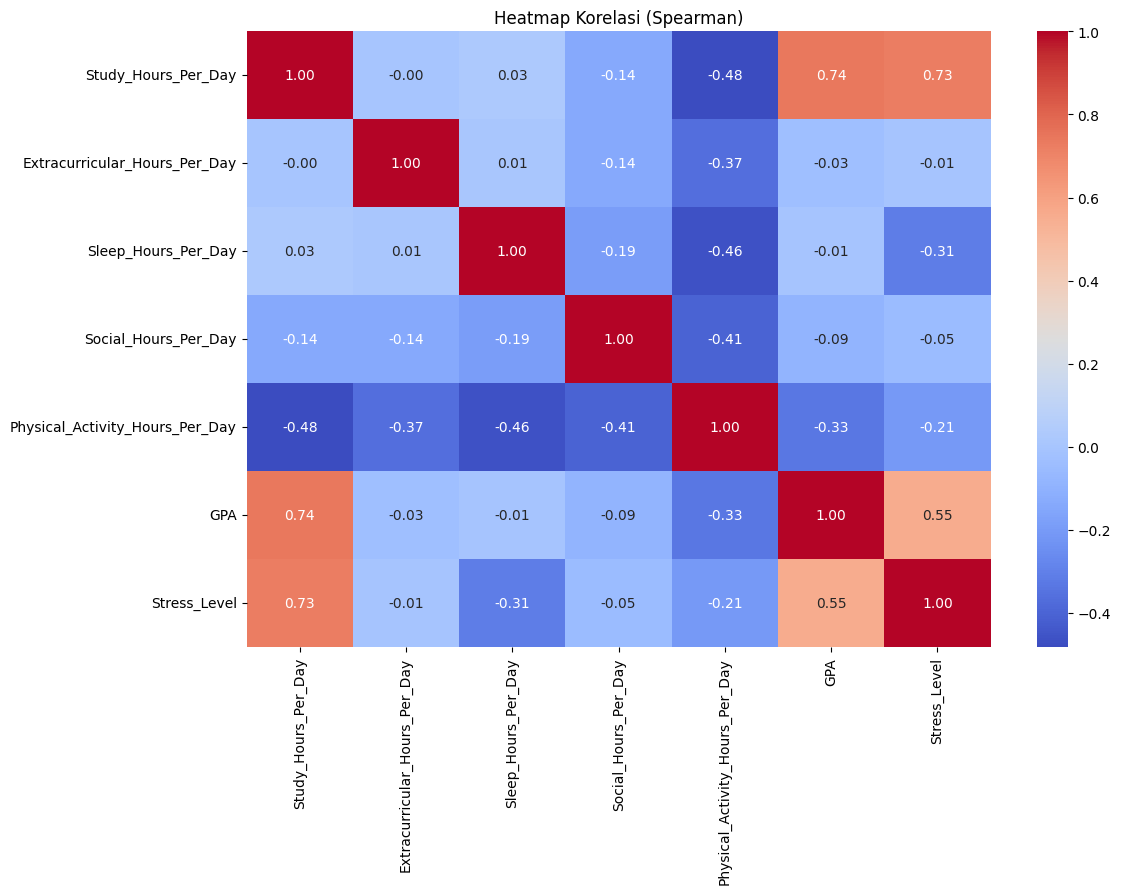

In [16]:
# Menghitung matriks korelasi menggunakan Spearman
correlation_matrix = df.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi (Spearman)")
plt.show()

##**OLS**

In [17]:
X_ols = df.drop(columns=['Stress_Level'])
Y_ols= df['Stress_Level']

x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, Y_ols, test_size=0.2, random_state=42)


In [18]:
# Menambahkan intercept ke fitur (OLS memerlukan intercept secara eksplisit)
x_train_with_intercept = sm.add_constant(x_train_ols)
x_test_with_intercept = sm.add_constant(x_test_ols)

# Membuat model OLS
ols_model = sm.OLS(y_train_ols, x_train_with_intercept).fit()

# Melihat hasil ringkasan model
print(ols_model.summary())

# Prediksi pada data uji
y_pred_ols = ols_model.predict(x_test_with_intercept)

# Evaluasi model (misalnya, Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse_ols = mean_squared_error(y_test_ols, y_pred_ols)
print("Mean Squared Error:", mse_ols)

                            OLS Regression Results                            
Dep. Variable:           Stress_Level   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     556.9
Date:                Wed, 25 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:59:29   Log-Likelihood:                -939.97
No. Observations:                1600   AIC:                             1892.
Df Residuals:                    1594   BIC:                             1924.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [19]:
# Menambahkan kolom ke data uji
x_test_ols["Stress_Level Real"] = y_test_ols.values
x_test_ols["Stress_Level Prediksi"] = y_pred_ols.values
x_test_ols["ERROR"] = x_test_ols["Stress_Level Prediksi"] - x_test_ols["Stress_Level Real"]
x_test_ols["PERSEN PREDIKSI"] = 1.0 - (abs (x_test_ols["Stress_Level Prediksi"] / x_test_ols["Stress_Level Real"]))
x_test_ols["PERSEN"] = x_test_ols["PERSEN PREDIKSI"] * 100

# Menampilkan data uji dengan kolom tambahan
x_test_ols.head()


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level Real,Stress_Level Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
1860,6.2,4.0,6.0,3.5,4.3,2.88,1,1.119712,0.119712,-0.119712,-11.971248
353,5.9,2.2,9.9,5.6,0.4,3.12,0,0.376924,0.376924,-inf,-inf
1333,9.6,2.3,8.3,3.5,0.3,3.41,2,2.041661,0.041661,-0.020830,-2.083032
905,7.2,0.5,7.6,2.1,6.6,3.11,1,1.250021,0.250021,-0.250021,-25.002091
1289,9.0,3.6,9.9,0.3,1.2,3.19,2,1.556515,-0.443485,0.221742,22.174238


In [20]:
x_test_ols.to_csv('hasil_prediksi_ols.csv', index=False)

In [21]:
dataset = pd.read_csv('/content/hasil_prediksi_ols.csv')
dataset

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level Real,Stress_Level Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,6.2,4.0,6.0,3.5,4.3,2.88,1,1.119712,0.119712,-0.119712,-11.971248
1,5.9,2.2,9.9,5.6,0.4,3.12,0,0.376924,0.376924,-inf,-inf
2,9.6,2.3,8.3,3.5,0.3,3.41,2,2.041661,0.041661,-0.020830,-2.083032
3,7.2,0.5,7.6,2.1,6.6,3.11,1,1.250021,0.250021,-0.250021,-25.002091
4,9.0,3.6,9.9,0.3,1.2,3.19,2,1.556515,-0.443485,0.221742,22.174238
...,...,...,...,...,...,...,...,...,...,...,...
395,7.4,2.1,6.7,3.1,4.7,3.44,1,1.470946,0.470946,-0.470946,-47.094650
396,9.7,1.4,5.8,3.4,3.7,3.67,2,2.489491,0.489491,-0.244745,-24.474529
397,8.9,2.2,8.3,1.5,3.1,3.37,2,1.780458,-0.219542,0.109771,10.977102
398,7.2,2.1,6.8,3.6,4.3,3.01,1,1.372805,0.372805,-0.372805,-37.280463


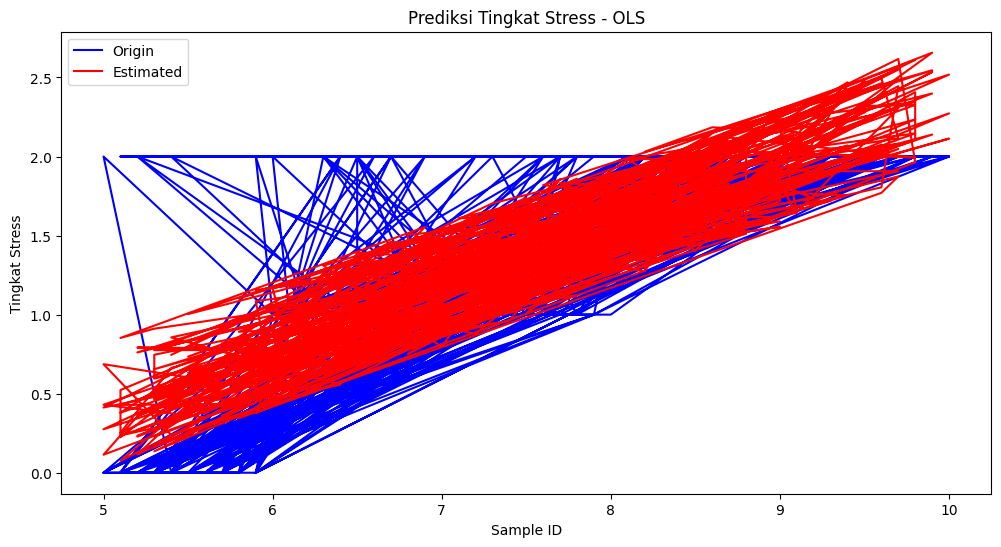

In [22]:
plt.figure(figsize=(12,6))
x = dataset.iloc[:,0].values
plt.plot(x, dataset["Stress_Level Real"], label = "Origin", color ="b")
plt.plot(x, dataset["Stress_Level Prediksi"], label = "Estimated", color ="r")

plt.legend()
plt.xlabel('Sample ID')
plt.ylabel('Tingkat Stress')
plt.title('Prediksi Tingkat Stress - OLS')
plt.show()

##**Normalisasi**

In [23]:
scaler = StandardScaler()
df[['Study_Hours_Per_Day', 'Social_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'GPA']] = scaler.fit_transform(df[['Study_Hours_Per_Day', 'Social_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'GPA']])
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,-0.404487,1.566246,0.820734,0.056543,-1.005896,-0.421837,1
1,-1.528451,1.306633,0.341473,0.885882,-0.528470,-1.225591,0
2,-1.668947,1.652784,1.163063,-0.891273,0.108097,-1.493509,0
3,-0.685478,0.095105,-0.206253,-0.595080,0.864021,-0.790224,1
4,0.438487,-1.202961,-0.685514,-0.298888,0.903806,1.319630,2


##**Visualisasi**

<ipython-input-24-5a4aef919aa6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress_Level', data=df, palette='Set2')


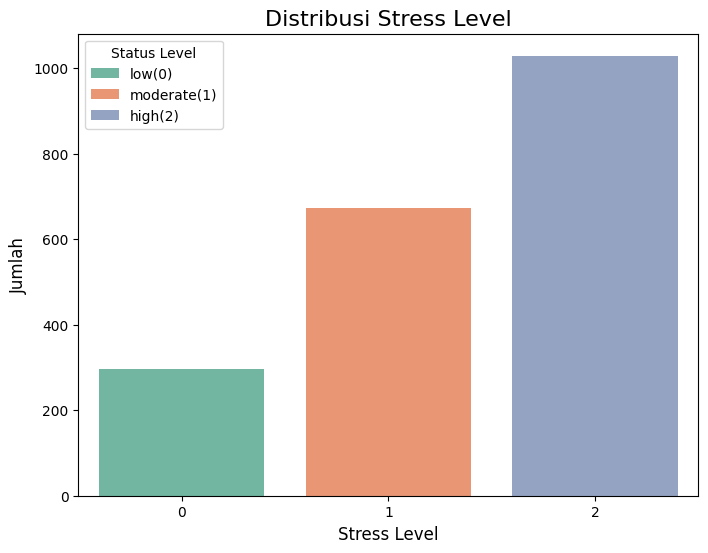

In [24]:
# Membuat diagram batang untuk status tingkat stress
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', data=df, palette='Set2')

# Menambahkan judul dan label
plt.title('Distribusi Stress Level', fontsize=16)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan legend
plt.legend(title='Status Level', labels=['low(0)', 'moderate(1)', 'high(2)'], loc='upper left')

# Menampilkan plot
plt.show()

##**Modelling**

In [25]:
X = df.drop(columns=['Stress_Level'])
Y = df['Stress_Level']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(x_train, y_train)



SVC()

##**Evaluasi**

In [26]:
y_pred = model.predict(x_test)
accuracy_score = model.score(x_test, y_test)
print("Akurasi:", accuracy_score)

# Akurasi pada data pelatihan
train_accuracy = model.score(x_train, y_train)
print("Akurasi pada Data Pelatihan:", train_accuracy)

Akurasi: 0.9525
Akurasi pada Data Pelatihan: 0.971875


In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print()

# validasi model menggunakan cross-validation
cv_scores = cross_val_score(model, X, Y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

Mean Squared Error: 0.0775
R-squared: 0.8620367382814673

Cross-Validation Scores: [0.955  0.9625 0.9475 0.945  0.96  ]
Mean Cross-Validation Score: 0.954
